<div class="alert alert-block alert-info"> Exploring Determinants of Academic Success </div>

---

<h1 style="color: black;">Table of Contents</h1>
<div class="toc">
    <ol style="font-family: Arial, sans-serif; font-size: 14px; line-height: 1.5; padding-left: 20px;">
        <li><a href="#Importing the Required Libraries" style="color: black; text-decoration: none;">Importing the Required Libraries</a></li>
        <li><a href="#Load Original Dataset and Store" style="color: black; text-decoration: none;">Load Original Dataset and Store</a></li>
        <ul style="font-family: Arial, sans-serif; font-size: 14px; line-height: 1.5; padding-left: 14px;">
            <li><a href="#Copy Original DataFrame" style="color: black; text-decoration: none;">Copy Original DataFrame</a></li>
        </ul>
        <li><a href="#Data Cleaning" style="color: black; text-decoration: none;">Data Cleaning</a></li>
        <ul style="font-family: Arial, sans-serif; font-size: 14px; line-height: 1.5; padding-left: 14px;">
            <li><a href="#One Hot Encoding & Label Encoding" style="color: black; text-decoration: none;">One Hot Encoding & Label Encoding</a></li>
        </ul>
        <li><a href="#Analyzing and Describing Final DataFrame" style="color: black; text-decoration: none;">Finalized DataFrame</a></li>
        <ul style="font-family: Arial, sans-serif; font-size: 14px; line-height: 1.5; padding-left: 14px;">
            <li><a href="#Description" style="color: black; text-decoration: none;">Data Description</a></li>
        </ul>
    </ol>
</div>

In [1]:
%autosave 0

Autosave disabled


In [2]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### 1. Importing the Required Libraries

In [42]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

#### 2. Load Original Dataset and Store

In [4]:
df = pd.read_csv("StudentPerformanceFactors.csv")

#### Analaysis of the DataFrame df

In [5]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [6]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [7]:
df.shape

(6607, 20)

In [8]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [10]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

#### Copy Original DataFrame

We will copy the original DataFrame to a new DataFrame to avoid any changes to the original DataFrame which we may need if there are any errors in data cleaning or data preprocessing.

In [26]:
df2 = df.copy()

#### Drop Unnecessary Columns

We drop certain columns because they are not necessary for our analysis (i.e. they are not part of the questions, Hypotheses, and Conjectures we are trying to answer).

In [27]:
df2 = df.drop(columns = ['Access_to_Resources', 'Previous_Scores', 'Internet_Access', 'Teacher_Quality', 'Parental_Education_Level', 'Tutoring_Sessions', 'School_Type', 'Physical_Activity', 'Learning_Disabilities', 'Distance_from_Home'], inplace = False)

With the below three lines of code, we notice that the column count has reduced from 20 to 10. 

In [28]:
df2.head()


,Hours_Studied,Attendance,Parental_Involvement,Extracurricular_Activities,Sleep_Hours,Motivation_Level,Family_Income,Peer_Influence,Gender,Exam_Score
0,23,84,Low,No,7,Low,Low,Positive,Male,67
1,19,64,Low,No,8,Low,Medium,Negative,Female,61
2,24,98,Medium,Yes,7,Medium,Medium,Neutral,Male,74
3,29,89,Low,Yes,8,Medium,Medium,Negative,Male,71
4,19,92,Medium,Yes,6,Medium,Medium,Neutral,Female,70


In [29]:
df2.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Extracurricular_Activities', 'Sleep_Hours', 'Motivation_Level',
       'Family_Income', 'Peer_Influence', 'Gender', 'Exam_Score'],
      dtype='object')

In [30]:
df2.shape

(6607, 10)

#### 3. Data Cleaning

#### One Hot Encoding & Label Encoding

In [31]:
# NOTE for Editors: We will have to change the names of the columns we are using here after rename command.
columns_to_apply_func = ['Motivation_Level', 'Family_Income', 'Peer_Influence', 'Parental_Involvement']

def f(x):
    if (x == "Low") | (x == "Negative"):
        return 0
    elif (x == 'Medium') | (x == "Neutral"):
        return 0.5
    elif (x == 'High') | (x == "Positive"):
        return 1

for col in columns_to_apply_func:
    df2[col] = df2[col].apply(f)

Any value in the column that does not match 'Yes' or 'No' becomes NaN after the mapping
This is just for error checking (i.e. to ensure that all values in the columns are either 'Yes' or 'No').

In [32]:
df2['Extracurricular_Activities'] = df2['Extracurricular_Activities'].map({'Yes': 1, 'No': 0}).fillna(0)

In [33]:
# Gender is binary in this dataset. If it was not, we would have to use one-hot encoding. 
# We will use label encoding here because it is binary.
df2['Gender'] = df2['Gender'].map({'Female': 0, 'Male': 1}) 

#### 4. Analyzing and Describing Final DataFrame

In [34]:
df2.head()

,Hours_Studied,Attendance,Parental_Involvement,Extracurricular_Activities,Sleep_Hours,Motivation_Level,Family_Income,Peer_Influence,Gender,Exam_Score
0,23,84,0.0,0,7,0.0,0.0,1.0,1,67
1,19,64,0.0,0,8,0.0,0.5,0.0,0,61
2,24,98,0.5,1,7,0.5,0.5,0.5,1,74
3,29,89,0.0,1,8,0.5,0.5,0.0,1,71
4,19,92,0.5,1,6,0.5,0.5,0.5,0,70


In [35]:
df2.describe()

,Hours_Studied,Attendance,Parental_Involvement,Extracurricular_Activities,Sleep_Hours,Motivation_Level,Family_Income,Peer_Influence,Gender,Exam_Score
count,6607.000000,6607.000000,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,0.543212,0.596035,7.02906,0.453231,0.393825,0.595429,0.577267,67.235659
std,5.990594,11.547475,0.347761,0.490728,1.46812,0.347899,0.371308,0.377938,0.494031,3.890456
min,1.000000,60.000000,0.000000,0.000000,4.00000,0.000000,0.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,0.500000,0.000000,6.00000,0.000000,0.000000,0.500000,0.000000,65.000000
50%,20.000000,80.000000,0.500000,1.000000,7.00000,0.500000,0.500000,0.500000,1.000000,67.000000
75%,24.000000,90.000000,1.000000,1.000000,8.00000,0.500000,0.500000,1.000000,1.000000,69.000000
max,44.000000,100.000000,1.000000,1.000000,10.00000,1.000000,1.000000,1.000000,1.000000,101.000000


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6607 non-null   int64  
 1   Attendance                  6607 non-null   int64  
 2   Parental_Involvement        6607 non-null   float64
 3   Extracurricular_Activities  6607 non-null   int64  
 4   Sleep_Hours                 6607 non-null   int64  
 5   Motivation_Level            6607 non-null   float64
 6   Family_Income               6607 non-null   float64
 7   Peer_Influence              6607 non-null   float64
 8   Gender                      6607 non-null   int64  
 9   Exam_Score                  6607 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 516.3 KB


After encoding the columns, we notice that we do not have any missing values in the DataFrame which will help us later on in data analysis, data visualization, and building machine learning models.

In [37]:
df2.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Extracurricular_Activities    0
Sleep_Hours                   0
Motivation_Level              0
Family_Income                 0
Peer_Influence                0
Gender                        0
Exam_Score                    0
dtype: int64

#### Description 
****


This cleaned dataset provides a comprehensive overview of select factors affecting student performance in exams. It includes information on attendance, parental involvement, and other aspects influencing academic success.

#### Column Descriptions


In [43]:

description_table = pd.DataFrame({
    "Column Name": df2.columns,
    "Data Type": df2.dtypes.values
})

description_table["Description"] = [
    'Number of hours spent studying per week',
    'A percentage of classes attended',
    'Categorized by 0, 0.5, 1, with 0 being the lowest and 1 being the highest concern levels',
    'Ascribed with 0 or 1 values to indicate whether a student is involved in extracurriculars',
    'How many hours did the student sleep',
    'Categorized by 0, 0.5, 1, with 0 being the lowest and 1 being the highest motivation levels',
    'Categorized by 0, 0.5, 1, with 0 being the lowest and 1 being the highest family income levels',
    'Categorized by 0, 0.5, 1, with 0 being positive and 1 being the negative peer influence representations',
    'Categorized by 0 or 1, with 0 being Female and 1 being the Male',
    'Continuous variable representing the final exam score'
]

description_table

,Column Name,Data Type,Description
0,Hours_Studied,int64,Number of hours spent studying per week
1,Attendance,int64,A percentage of classes attended
2,Parental_Involvement,float64,"Categorized by 0, 0.5, 1, with 0 being the low..."
3,Extracurricular_Activities,int64,Ascribed with 0 or 1 values to indicate whethe...
4,Sleep_Hours,int64,How many hours did the student sleep
5,Motivation_Level,float64,"Categorized by 0, 0.5, 1, with 0 being the low..."
6,Family_Income,float64,"Categorized by 0, 0.5, 1, with 0 being the low..."
7,Peer_Influence,float64,"Categorized by 0, 0.5, 1, with 0 being positiv..."
8,Gender,int64,"Categorized by 0 or 1, with 0 being Female and..."
9,Exam_Score,int64,Continuous variable representing the final exa...


#### 5. Exploratory Data Analysis

Checking the correlation between the columns in the DataFrame. 

Important Notes About Correlation Matrices: 
- Correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic tool for checking the results of the analysis.
- The matrix, here, only measures the strength and direction of linear relationships between pairs of variables, but it does not capture non-linear relationships (i.e. this includes interactions between multiple variables). 
- Some variables, here, are categorical and some are continuous. The correlation matrix only captures linear relationships between continuous variables. 
- Even if the categorical variables have been encoded as numbers, the correlation matrix will not capture the meanigful relationships between them.

General Questions to Ask: 
1. What is the relationship between the amount of workload/effort that students put in (e.g. using the measure ‘Hours_Studied’) and students’ exam performance? 
2. What is the correlation between a student’s attendance and exam performance?
3. What is the correlation between motivation level and exam performance?
4. What is the relationship between a parent’s level of involvement in a student’s education and their performance in exams? Similarly, what is the relationship between peer influence and students’ exam performance?



<Figure size 1200x800 with 0 Axes>

<Axes: >

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'Hours_Studied'),
  Text(1.5, 0, 'Attendance'),
  Text(2.5, 0, 'Parental_Involvement'),
  Text(3.5, 0, 'Extracurricular_Activities'),
  Text(4.5, 0, 'Sleep_Hours'),
  Text(5.5, 0, 'Motivation_Level'),
  Text(6.5, 0, 'Family_Income'),
  Text(7.5, 0, 'Peer_Influence'),
  Text(8.5, 0, 'Gender'),
  Text(9.5, 0, 'Exam_Score')])

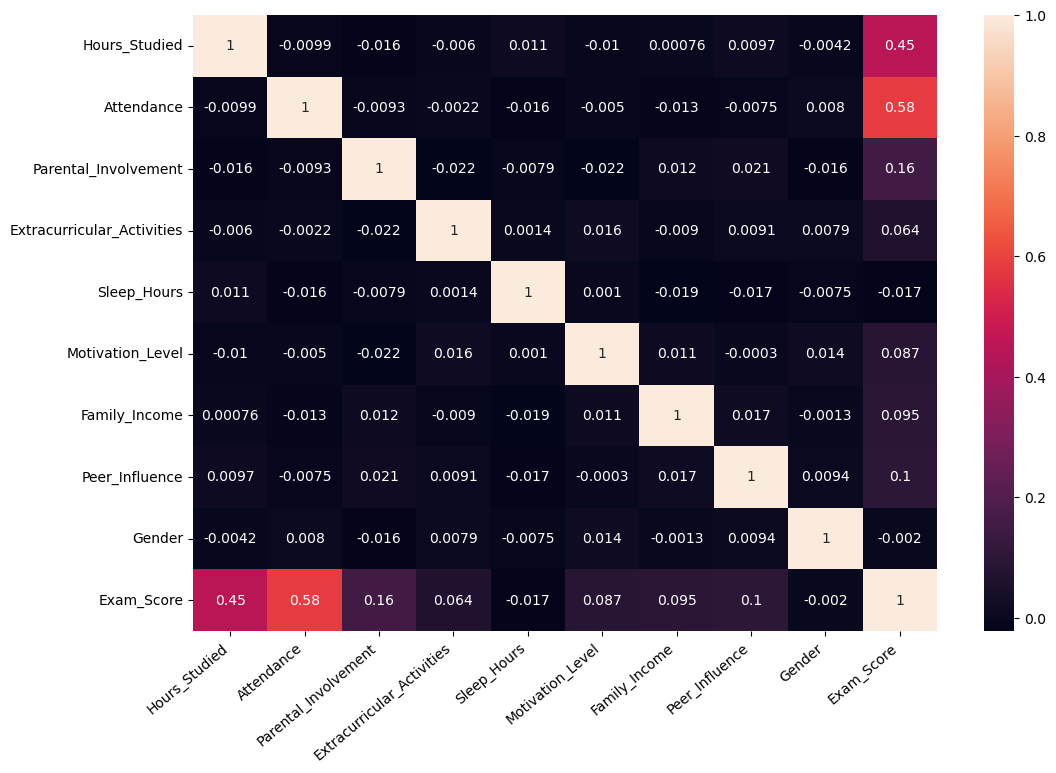

In [53]:
correlation_matrix = df2.corr()
plt.figure(figsize=(12, 8)) 
sns.heatmap(correlation_matrix, annot = True) # annot = True will show the values within the cells
plt.xticks(rotation = 40, ha='right') # ha = 'right' will make the x-axis labels appear horizontally so that they do not overlap
plt.show()

#### Key Analysis from Correlation Matrix



Strong predictors of Exam Performance: 
- Attendance (strongest correlation: 0.581).
- Hours_Studied (moderate correlation: 0.445).

Weak or Indirect Predictors:
- Parental Involvement, Peer Influence, and Motivation Level have weak positive relationships with exam performance.

Some Unexpected Findings:
- Study Hours and Attendance have no meaningful correlation (-0.009). Contrary to the hypothesis, students with high attendance do not seem to study more, and vice versa.
- Sleep hours have a weak negative correlation with exam performance (-0.1). 

Multicollinearity: A situation where two or more variables are highly correlated. Generally, a correlation above 0.8 or below -0.8 between indepdent variables is considered multicollinearity.In this case, there is no multicollinearity between the variables because the highest correlation is 0.581 between Attendance and Exam Performance. Therefore, we can skip removing variables or combining variables to create a composite variable.

There is a need for further analysis to understand the complex relationships between these variables and student performance. For example, it might be worth investigating if motivation affects other factors like study hours or attendance.

Note: Correlation only captures linear relationships, so it’s useful to also use other plots for key features to detect non-linear patterns.
